In [1]:
import pandas as pd
import numpy as np

In [2]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [5]:
CE=pd.read_csv('20190321 Predicting carbonemissions.csv')

In [6]:
CE.head()

,Account ID,Company Name,Listed,Ticker,ISIN,HQ Country,GICS Sector,Accounting Year End,Reported Scope 1 (tCO2e),Estimated Scope 1 (tCO2e),...,Socialindex.1,Governanceindex.1,ESGindex.1,ISIN lower,2016vol,2017vol,2018vol,2019vol,VolFactor,Carbon Emission (tCO2e/mmUSD)
0,30238,Agencia de Proteccion Ambiental,Yes,ADN LN,NaN,NaN,NaN,29/09/2016,0.65,NaN,...,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,539.281077
1,59859,Sociedad Comercial del Plata SA,Yes,COME AR,ARP290071462,Argentina,Energy,31/12/2016,NaN,"1,400",...,0.28,0.31,0.32,arp290071462,0.023033,0.023079,0.033899,0.021700,0.178446,26.030882
2,1408,Banco de Galicia y Buenos Aires S.A.,Yes,GALI AR,NaN,Argentina,Financials,31/12/2016,933.37,NaN,...,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,7.968841
3,20949,YPF SA,Yes,YPFD AR,ARP9897X1319,Argentina,Energy,31/12/2016,NaN,"12,000,000",...,0.07,0.13,0.27,arp9897x1319,0.024063,0.021263,0.030650,0.029235,0.064662,926.111720
4,57626,Australia Post,Yes,1067Z AU,0,Australia,Industrials,30/06/2016,"119,338.00",NaN,...,0.28,0.31,0.32,0,NaN,NaN,NaN,NaN,0.000000,59.908367


In [7]:
CE.columns

Index(['Account ID', 'Company Name', 'Listed', 'Ticker', 'ISIN', 'HQ Country',
       'GICS Sector', 'Accounting Year End', ' Reported Scope 1 (tCO2e) ',
       ' Estimated Scope 1 (tCO2e) ', 'Scope 1 source', 'Scope 1 quality flag',
       ' Reported market-based Scope 2 (tCO2e) ', ' Note ',
       ' Reported location-based Scope 2 (tCO2e) ',
       ' Estimated location-based Scope 2 (tCO2e) ',
       'Location-based Scope 2 source', 'Location-based Scope 2 quality flag',
       'Scope 2 company comments', 'GHG revenue intensity (tCO2e/mmUSD)',
       'Scope 2 figure used for intensity', 'amplification.wordsindex',
       'DeAmplification.wordsindex', 'HE_negativeindex', 'HE_positiveindex',
       'angerindex', 'anticipationindex', 'disgustindex', 'fearindex',
       'joyindex', 'sadnessindex', 'surpriseindex', 'trustindex',
       'LMnegativeindex', 'LMpositiveindex', 'LMuncertaintyindex',
       'BasicNegativeWordsindex', 'PositivePolarisedindex',
       'NegativePolarisedindex', 'P

In [ ]:
GHG revenue intensity (tCO2e/mmUSD)'

In [12]:
CE_clean=CE.drop(['GHG revenue intensity (tCO2e/mmUSD)'],axis=1)

In [13]:
CE_clean.head()

,Account ID,Company Name,Listed,Ticker,ISIN,HQ Country,GICS Sector,Accounting Year End,Reported Scope 1 (tCO2e),Estimated Scope 1 (tCO2e),...,Socialindex.1,Governanceindex.1,ESGindex.1,ISIN lower,2016vol,2017vol,2018vol,2019vol,VolFactor,Carbon Emission (tCO2e/mmUSD)
0,30238,Agencia de Proteccion Ambiental,Yes,ADN LN,NaN,NaN,NaN,29/09/2016,0.65,NaN,...,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,539.281077
1,59859,Sociedad Comercial del Plata SA,Yes,COME AR,ARP290071462,Argentina,Energy,31/12/2016,NaN,"1,400",...,0.28,0.31,0.32,arp290071462,0.023033,0.023079,0.033899,0.021700,0.178446,26.030882
2,1408,Banco de Galicia y Buenos Aires S.A.,Yes,GALI AR,NaN,Argentina,Financials,31/12/2016,933.37,NaN,...,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,7.968841
3,20949,YPF SA,Yes,YPFD AR,ARP9897X1319,Argentina,Energy,31/12/2016,NaN,"12,000,000",...,0.07,0.13,0.27,arp9897x1319,0.024063,0.021263,0.030650,0.029235,0.064662,926.111720
4,57626,Australia Post,Yes,1067Z AU,0,Australia,Industrials,30/06/2016,"119,338.00",NaN,...,0.28,0.31,0.32,0,NaN,NaN,NaN,NaN,0.000000,59.908367


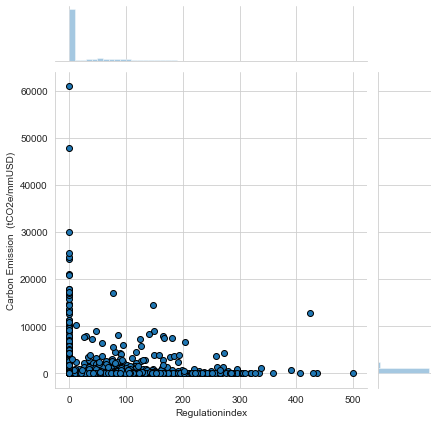

In [35]:
sns.set_style('whitegrid') 
sns.jointplot(x='Regulationindex',y='Carbon Emission  (tCO2e/mmUSD)',data=CE_clean,kind='scatter',edgecolor='black');

In [31]:
Company_emissions=CE_clean[['Company Name','Carbon Emission  (tCO2e/mmUSD)']]

In [23]:
Company_emissions.head()

,Company Name,Carbon Emission (tCO2e/mmUSD)
0,Agencia de Proteccion Ambiental,539.281077
1,Sociedad Comercial del Plata SA,26.030882
2,Banco de Galicia y Buenos Aires S.A.,7.968841
3,YPF SA,926.111720
4,Australia Post,59.908367


In [24]:
Company_emissions.max()

Company Name                      ÜLKER BISKÜVI SANAYI A.S.
Carbon Emission  (tCO2e/mmUSD)                      60946.6
dtype: object

In [25]:
Company_emissions.min()

Company Name                      3M Company
Carbon Emission  (tCO2e/mmUSD)             0
dtype: object

In [27]:
Company_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 2 columns):
Company Name                      3987 non-null object
Carbon Emission  (tCO2e/mmUSD)    3987 non-null float64
dtypes: float64(1), object(1)
memory usage: 62.4+ KB


In [28]:
Company_emissions.describe()

,Carbon Emission (tCO2e/mmUSD)
count,3987.000000
mean,539.281077
std,2126.047089
min,0.000000
25%,14.963002
50%,53.491972
75%,259.786994
max,60946.572930


In [33]:
Sector_emissions=CE_clean[['Company Name','GICS Sector','Carbon Emission  (tCO2e/mmUSD)','HQ Country']]

In [34]:
Sector_emissions.head()

,Company Name,GICS Sector,Carbon Emission (tCO2e/mmUSD),HQ Country
0,Agencia de Proteccion Ambiental,NaN,539.281077,NaN
1,Sociedad Comercial del Plata SA,Energy,26.030882,Argentina
2,Banco de Galicia y Buenos Aires S.A.,Financials,7.968841,Argentina
3,YPF SA,Energy,926.111720,Argentina
4,Australia Post,Industrials,59.908367,Australia


In [36]:
from sklearn.model_selection import train_test_split

In [44]:
X=CE_clean[['Company Name', 'GICS Sector', 'ESGindex.1', 'Regulationindex.1','Socialindex.1','VolFactor']]

y=CE_clean['Carbon Emission  (tCO2e/mmUSD)']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
                                                    random_state=101)

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 6 columns):
Company Name         3987 non-null object
GICS Sector          3986 non-null object
ESGindex.1           3987 non-null float64
Regulationindex.1    3987 non-null float64
Socialindex.1        3987 non-null float64
VolFactor            3987 non-null float64
dtypes: float64(4), object(2)
memory usage: 187.0+ KB


In [51]:
COMPANY_NAME = pd.get_dummies(X['Company Name'],drop_first=True)

In [54]:
COMPANY_NAME.head()

,3Sbio,3i Group,58.com Inc,A Schulman Inc,A.G. Barr Plc,A.P. Moller - Maersk,A2A,AAC Technologies Holdings,AAK AB,ABB,...,"mixi, inc.",natural capital partners,salesforce.com,thyssenkrupp AG,ÅF AB,ÇIMSA ÇIMENTO SANAYI VE TICARET A.S.,Össur hf.,Österreichische Post AG,Ørsted,ÜLKER BISKÜVI SANAYI A.S.
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
GICS = pd.get_dummies(X['GICS Sector'],drop_first=True)

In [55]:
X=CE_clean[['COMAPNY_NAME', 'GICS', 'ESGindex.1', 'Regulationindex.1','Socialindex.1','VolFactor']]

y=CE_clean['Carbon Emission  (tCO2e/mmUSD)']

KeyError: "['COMAPNY_NAME', 'GICS'] not in index"